# **Wine Quality Classification Project**

## Introduction

The **Wine Quality Classification Project** aims to predict the quality of wine based on its chemical properties. Wine quality is an important factor in both the wine industry and for consumers, and machine learning can help automate and improve the accuracy of such predictions.

In this project, we use the **Wine Quality Dataset**, which includes features like acidity, sugar content, pH, and alcohol levels. Two different classification algorithms are applied:

- **Logistic Regression**: A simple and interpretable model to understand the relationship between features and wine quality.  
- **Random Forest Classifier**: An ensemble method that can capture complex patterns in the data for higher accuracy.

The workflow of the project includes:  
1. **Exploratory Data Analysis (EDA)**: Understanding the dataset, identifying duplicates and missing values, and visualizing patterns.  
2. **Preprocessing**: Cleaning the data, encoding categorical variables, and scaling features for better model performance.  
3. **Model Training and Evaluation**: Building both Logistic Regression and Random Forest models, checking for overfitting, and evaluating performance on the test set.

Each step is thoroughly documented to ensure clarity and reproducibility. This notebook serves as a complete guide to the process of building a reliable wine quality classifier.


## Table of Contents
- [Import](#Import)
- [EDA](#EDA)
  - [Duplicated Value](#Duplicated-Value)
  - [Missing Value](#Missing-Value)
  - [Visualize the Data](#Visualize-the-Data)
- [Preprocessing](#Preprocessing)
  - [Scaling](#Scaling)
- [Train Model](#Train-Model)
  - [Logistic Regression](#Logistic-Regression)
    - [Check Overfitting](#Check-Overfitting)
    - [Test Model Results](#Test-Model-Results)
  - [RandomForestClassifier](#RandomForestClassifier)
- [Conclusion](#Conclusion)




## Import

In [5]:
import numpy as np
import pandas as pd 
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings as wr 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

wr.filterwarnings('ignore')

In [17]:
df = pd.read_csv('datasets/WineQT.csv')

In [18]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


## EDA
*Exploratory Data Analysis*

In [19]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [20]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597


In [21]:
df.shape

(1143, 13)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [23]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [24]:
df.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality',
 'Id']

In [25]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [26]:
df.describe(include="float64")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000


### Duplicated Value
*Checking for duplicate rows*

In [27]:
duplicated_data = df.duplicated().sum()
print(duplicated_data)

0


In [28]:
df.drop_duplicates(inplace=True)
print(duplicated_data)

0


### Missing Value
*Handling missing data*

In [29]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [30]:
(df.isnull().sum()/len(df)) * 100

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
Id                      0.0
dtype: float64

## Visualize the Data
*Exploring distributions and relationships*

In this section, we use **various plots and charts** to better understand the dataset and the relationships between features.  
By examining distributions, correlations, and patterns, we can uncover insights that help guide preprocessing steps and improve model performance.


In [31]:
df.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality',
 'Id']

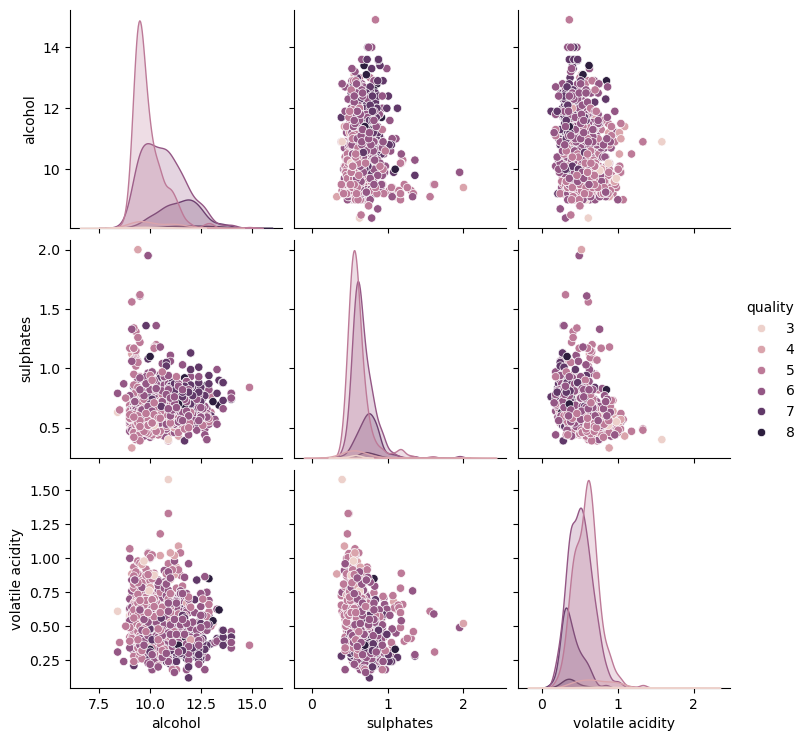

In [32]:
sns.pairplot(df, vars=[
    'alcohol', 'sulphates', 
    'volatile acidity'],
    hue='quality'
)
plt.show()

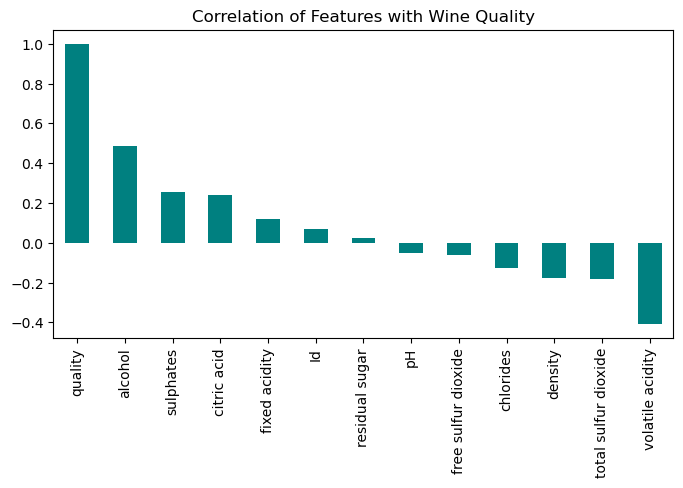

In [33]:
plt.figure(figsize=(8,4))
df.corr()["quality"].sort_values(ascending=False).plot(kind="bar", color="teal")
plt.title("Correlation of Features with Wine Quality")
plt.show()

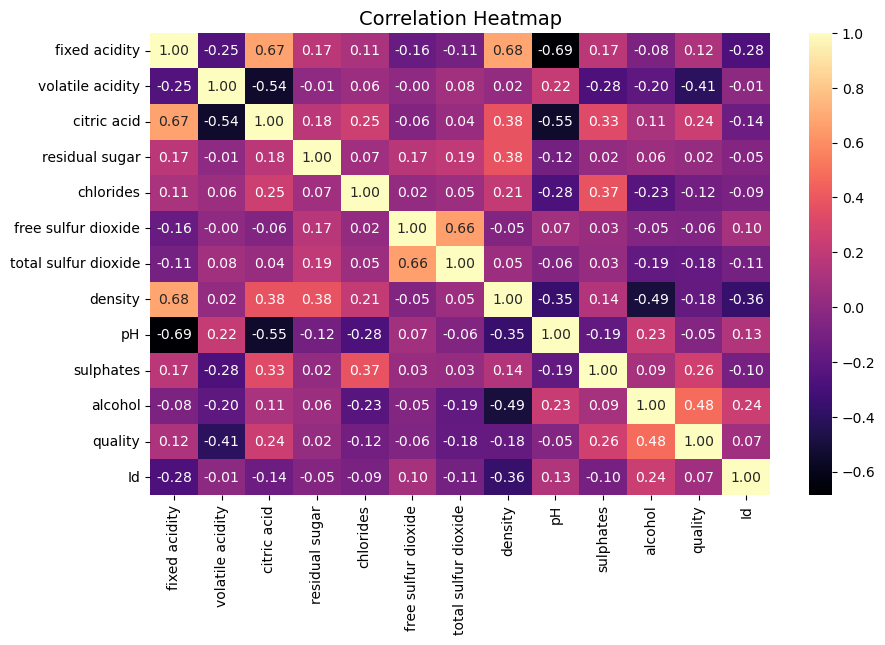

In [34]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="magma", fmt=".2f")
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

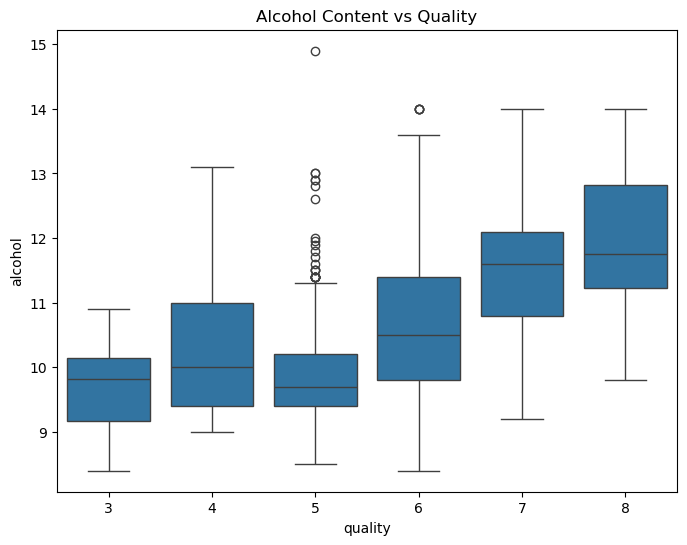

In [35]:
plt.figure(figsize=(8,6))
sns.boxplot(x="quality", y="alcohol", data=df)
plt.title("Alcohol Content vs Quality")
plt.show()

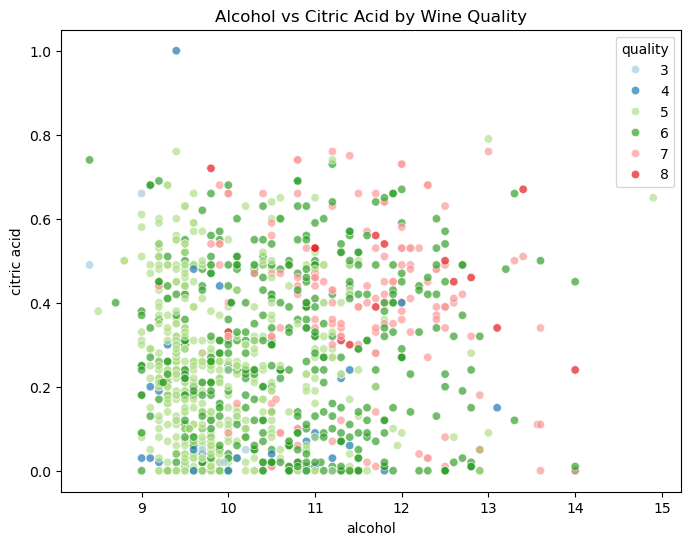

In [36]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df, x="alcohol", y="citric acid", 
    hue="quality", palette="Paired", alpha=0.7
)
plt.title("Alcohol vs Citric Acid by Wine Quality")
plt.show()

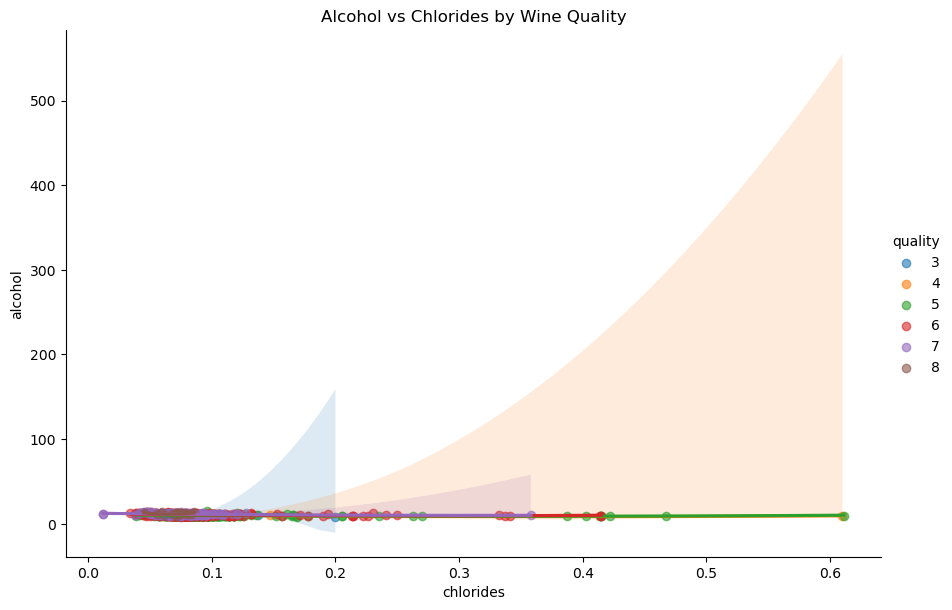

In [37]:
sns.lmplot(
    data=df, x="chlorides", y="alcohol",
    hue="quality", order=2, height=6, aspect=1.5, scatter_kws={"alpha":0.6}
)
plt.title("Alcohol vs Chlorides by Wine Quality")
plt.show()

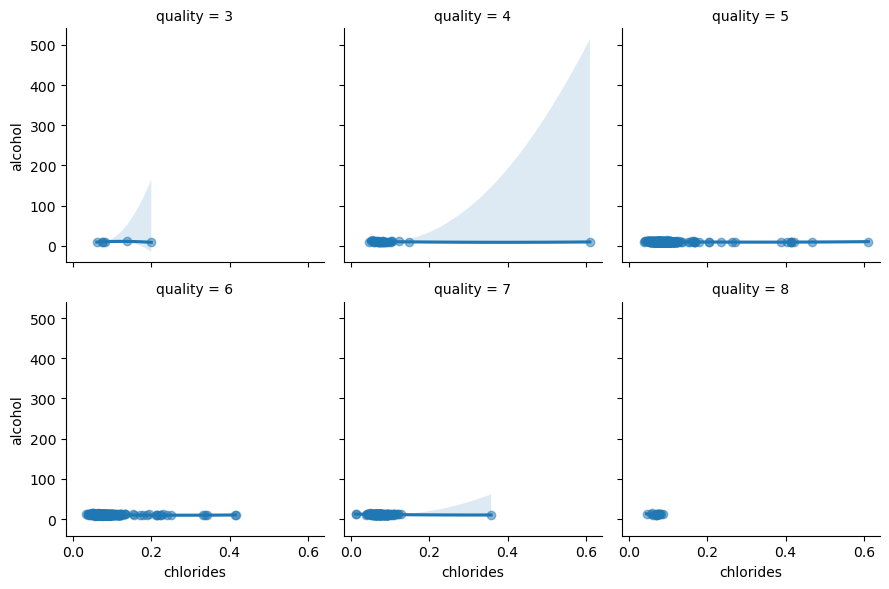

In [38]:
sns.lmplot(
    data=df, x="chlorides", y="alcohol",
    col="quality", col_wrap=3, order=2, height=3, scatter_kws={"alpha":0.5}
)
plt.show()

This plot shows a **polynomial regression (order=2)** between **chlorides** and **alcohol**.  
- Each point represents a wine sample.  
- The **scatter points** show the actual data, while the **teal curve** represents the polynomial regression fit.  
- Using a second-order polynomial helps capture potential **non-linear relationships** between chlorides and alcohol content.  

This visualization provides insights into how these two features interact, which can inform feature engineering or model selection.


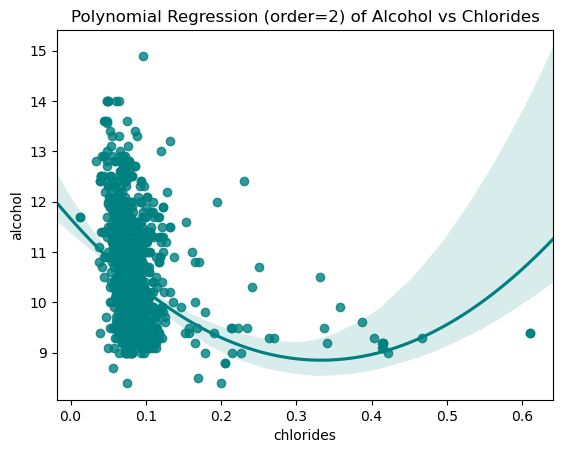

In [39]:
sns.regplot(
    data=df, x="chlorides", y="alcohol",
    scatter=True, truncate=False, order=2, color="teal"
)
plt.title("Polynomial Regression (order=2) of Alcohol vs Chlorides")
plt.show()

This scatter plot shows the relationship between **sulphates** and **density** in the dataset.  
- **Color (`hue`)** represents wine quality.  
- **Size (`size`)** reflects the level of chlorides.  

It helps visualize patterns, clusters, or trends among these features and guides preprocessing and modeling decisions.


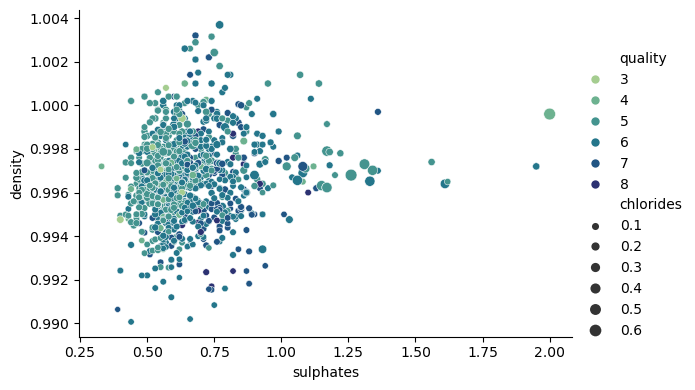

In [40]:
sns.relplot(
    data=df,
    x="sulphates", y="density", hue="quality", size="chlorides",
    kind="scatter", palette="crest", height=4, aspect=1.5
)
plt.show()


# Preprocessing
*Preparing data for modeling, encoding categorical variables*

In [41]:
df = df.drop("Id", axis=1)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


### Scaling
*Normalizing features for better performance*

In this step, we apply **Standard Scaling** to numerical features to normalize their values.  
- Features like **acidity, sugar, chlorides, sulfur dioxide, density, pH, sulphates, and alcohol** are scaled.  
- StandardScaler transforms the data so that each feature has a **mean of 0** and a **standard deviation of 1**.  

Scaling helps improve the performance and convergence of machine learning models by ensuring all features are on a similar scale.

In [43]:
feature_scale = [
 'fixed acidity', 'volatile acidity',
 'citric acid','residual sugar',
 'chlorides','free sulfur dioxide',
 'total sulfur dioxide',
 'density','pH',
 'sulphates','alcohol',
]
scaler = StandardScaler()
df[feature_scale] = scaler.fit_transform(df[feature_scale])

# Train Model
*Building and evaluating models*

## Creating Classification Target

Here, we convert the original **wine quality** scores into a **binary classification target**:  

- Wines with a quality score of **7 or higher** are labeled as `1` (good quality).  
- Wines with a quality score below 7 are labeled as `0` (not good quality).  

`X` contains all features except the original `quality` and the new target, while `y` contains the **binary target** for classification.

In [44]:
df['goodquality'] = [1 if x >= 7 else 0 for x in df['quality']]
X = df.drop(['quality','goodquality'], axis = 1)
y = df['goodquality']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [46]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
12,0.108132,-1.399789,1.483400,-0.540205,0.107253,1.891910,1.742116,0.088134,-0.070340,0.541862,0.053515
758,0.909584,-1.177016,1.483400,-0.392638,-0.294891,-1.231259,-1.157072,-0.722583,-1.028222,0.424439,0.885522
636,0.337119,-1.232709,0.466104,0.050060,-0.654705,-0.548066,-0.211021,-0.577069,0.568248,0.189593,1.255303
1109,-0.979552,1.941813,-1.161568,-0.245072,-0.443050,-0.352868,-0.790859,-0.192499,1.398413,-0.573658,-0.501156
743,-0.407087,-0.620082,-0.093408,1.009240,0.361240,1.208717,1.345385,0.576642,-1.028222,-0.514946,-1.240717
...,...,...,...,...,...,...,...,...,...,...,...
1044,-0.922305,2.832907,-0.958109,-0.171289,-0.421885,0.330325,-0.424646,-0.130136,1.334554,-0.514946,0.515741
1095,-0.178100,-0.787162,0.160916,-0.466421,-0.273726,1.599113,1.162279,0.228450,0.504389,-0.280100,-1.333163
1130,-0.521580,-1.009936,0.313510,-0.097506,-0.400719,-0.645665,-0.607752,-1.055184,0.312813,-0.338812,1.347748
860,-0.235347,0.215318,0.211781,-0.392638,-0.167898,-0.548066,1.009690,0.020574,-0.134198,0.189593,-0.870937


## Logistic Regression
*Training Logistic Regression model*

In this step, we train a **Logistic Regression** model to classify wine quality.  

- `class_weight='balanced'` is used because our dataset is **imbalanced**.  
- Without balancing, the model achieves around **90% accuracy**, but this is misleading due to class imbalance.  
- With balanced weights, accuracy drops to about **80%**, but predictions are more **reliable and fair**, especially on the **test data**.  
- `max_iter=1000` increases the number of iterations to ensure the model **converges** during training.  

This approach ensures that the model does not favor the majority class and provides better generalization on unseen data.


In [47]:
logreg = LogisticRegression(class_weight='balanced', max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [48]:
y_pred = logreg.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0])

The Logistic Regression model achieved an **accuracy of ~80% ✅** on the test set.  

- Although this is slightly lower than the unbalanced model (~90%), it is a **more reliable measure** because the dataset is imbalanced.  
- Using `class_weight='balanced'` ensures the model pays attention to the minority class, resulting in **better generalization** and fairer predictions on unseen data.


In [49]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8034934497816594


### Check Overfitting
*Evaluating model complexity*

In this step, we check whether the Logistic Regression model is **overfitting**:  

- **Train Accuracy** shows how well the model fits the training data.  
- **Test Accuracy** shows performance on unseen data.  

Here, we see:  
- Train Accuracy ≈ 79%  
- Test Accuracy ≈ 80% ✅  

Since the train and test accuracies are very close, the model is **not overfitting**.  

We also perform **5-fold cross-validation** to evaluate the model's stability and generalization:  
- `cross_val_score` splits the data into 5 folds, trains on 4 folds, and tests on the remaining fold iteratively.  
- The mean CV score provides a **reliable estimate of model performance** on unseen data.

In [50]:
print("Train Accuracy:", logreg.score(X_train, y_train))
print("Test Accuracy:", logreg.score(X_test, y_test))

Train Accuracy: 0.7899343544857768
Test Accuracy: 0.8034934497816594


In [51]:
scores = cross_val_score(logreg, X, y, cv=5)
print("CV scores:", scores)
print("Mean CV score:", scores.mean())

CV scores: [0.86899563 0.71615721 0.83842795 0.6622807  0.8377193 ]
Mean CV score: 0.7847161572052401


### Test Model Results

The Logistic Regression model was tested on 10 new wine samples:  

- **Predictions**: `[0 1 0 0 0 1 0 0 0 0]`  
- **Accuracy**: 70% ✅  

**Observations:**  
- Class 0 (not good quality) is predicted very accurately (recall = 1.0).  
- Class 1 (good quality) is less accurately predicted (recall = 0.4).  
- Overall, the model generalizes reasonably well on new data, but may **under-predict the minority class**.


In [52]:
columns = ['fixed acidity','volatile acidity','citric acid','residual sugar',
           'chlorides','free sulfur dioxide','total sulfur dioxide','density',
           'pH','sulphates','alcohol']

new_data = [
    [7.0, 0.6, 0.0, 2.0, 0.08, 12, 40, 0.997, 3.5, 0.55, 10.0],  # 1
    [6.5, 0.4, 0.3, 1.8, 0.05, 15, 50, 0.995, 3.3, 0.6, 11.5],   # 1
    [5.8, 0.5, 0.3, 2.5, 0.05, 20, 60, 0.994, 3.4, 0.6, 11.0],   # 0
    [8.1, 0.6, 0.25, 1.5, 0.07, 14, 40, 0.998, 3.3, 0.58, 10.5], # 0
    [7.4, 0.7, 0.0, 1.9, 0.076, 11, 34, 0.9978, 3.51, 0.56, 9.4],# 0
    [6.9, 0.3, 0.2, 1.6, 0.06, 10, 30, 0.996, 3.2, 0.55, 12.0],  # 1
    [6.1, 0.7, 0.1, 2.1, 0.07, 18, 50, 0.995, 3.3, 0.5, 10.5],   # 0
    [7.2, 0.5, 0.25, 1.8, 0.08, 14, 42, 0.996, 3.4, 0.57, 11.8], # 1
    [5.9, 0.6, 0.0, 2.2, 0.05, 16, 55, 0.9945, 3.35, 0.55, 10.8],# 0
    [7.1, 0.4, 0.3, 1.7, 0.07, 13, 45, 0.9965, 3.5, 0.58, 11.2]  # 1
]

y_true = [1,1,0,0,0,1,0,1,0,1]

X_new = pd.DataFrame(new_data, columns=columns)
X_new_scaled = scaler.transform(X_new)
y_pred = logreg.predict(X_new_scaled)



In [53]:
print("Predictions on new data:", y_pred)
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy on new data:", accuracy)
print(classification_report(y_true, y_pred))

Predictions on new data: [0 1 0 0 0 1 0 0 0 0]
Accuracy on new data: 0.7
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       1.00      0.40      0.57         5

    accuracy                           0.70        10
   macro avg       0.81      0.70      0.67        10
weighted avg       0.81      0.70      0.67        10



## RandomForestClassifier
*Training and evaluating Random Forest model*

- 200 trees, `class_weight='balanced'` to handle class imbalance.  
- Test Accuracy ≈ 93% ✅  
- Class 0 predicted very accurately; Class 1 less so due to imbalance.  
- Overall, Random Forest captures complex patterns and outperforms Logistic Regression on the test set.

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

y_test_pred = rf.predict(X_test)

In [55]:
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Test Accuracy: 0.9301310043668122
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       201
           1       0.77      0.61      0.68        28

    accuracy                           0.93       229
   macro avg       0.86      0.79      0.82       229
weighted avg       0.93      0.93      0.93       229



# Conclusion

In this project, we built two classification models to predict wine quality:

- **Logistic Regression**  
  - Balanced class weight was used due to imbalanced data.  
  - Test accuracy ≈ 80% ✅  
  - Performs reasonably well but struggles with the minority class (high-quality wines).  

- **Random Forest Classifier**  
  - Handles class imbalance with `class_weight='balanced'`.  
  - Test accuracy ≈ 93% ✅  
  - Excellent performance for Class 0, moderate for Class 1 due to fewer samples.  
  - Captures complex patterns and outperforms Logistic Regression on this dataset.  

**Summary:**  
- Random Forest provides the highest overall accuracy and better generalization.  
- Logistic Regression is simpler and interpretable but less precise for minority classes.  
- Visualizations and preprocessing were crucial in understanding data patterns and improving model performance.  

Overall, this workflow demonstrates how EDA, preprocessing, and model selection work together to build reliable wine quality classifiers.
